In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib

#  Importing and Preprocessing the Iris Dataset


In [2]:
from sklearn import datasets

iris=datasets.load_iris()
features=iris.data
target=iris.target

df=pd.DataFrame(features)#pandas df for better undersanding of dataset
#also it can be directly passed to algo
df.columns=iris.feature_names#add column names

In [3]:
print(target)
iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
print(df.shape)
print(df.head(20))

(150, 4)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6         

In [5]:
# print data set descriptions and class distributions
print(df.describe())
#all minimums are defined indicating no missing values

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


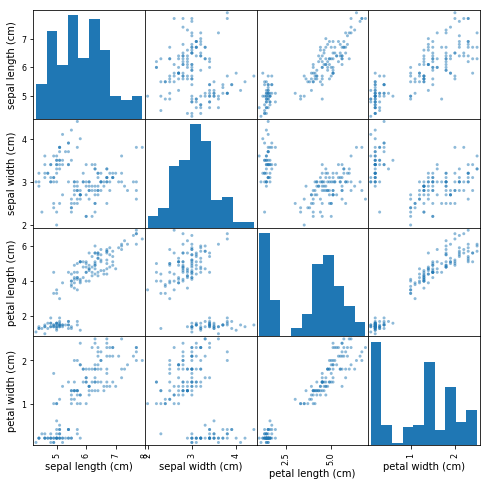

In [8]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
# display scatter plot matrix
scatter_matrix(df,figsize=(8,8))
plt.show()

petal length and width shows very high linear correlation=> can be compressed down(reduced to its principle components) to a single feature using PCA reduction
sepal length and width are somewhat correlated so they can be reduced

we see almost none random distribution of data and clusters are visible.obviously deep neural n/ws or even a simple neural n/w will give amazing results but still clustering algo will work good too

# The Elbow Method
Since we already known that only three species of flowers are represented in this dataset, it's easy to predict the number of clusters we will need. However, what would we do if we didn't know this information? Since K-Means clustering is an unsupervised learning method, we often won't know the number of clusters necessary beforehand. Fortunately, the elbow method is commonly used to determine the appropriate number of clusters for a dataset.

In [9]:
# KMeans Clustering - Elbow Method to Determine Optimal Number of Clusters
from sklearn.cluster import KMeans

X=[]
Y=[]

for i in range(1,31):
    #initialize and fit the kmeans model
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    
    X.append(i)#append number of clusters
    
    #append average within-cluster sum of squares to y data list
    #averaged over 150 so to not get total wcss which is actually the inertia
    awcss=kmeans.inertia_/df.shape[0]
    Y.append(awcss)

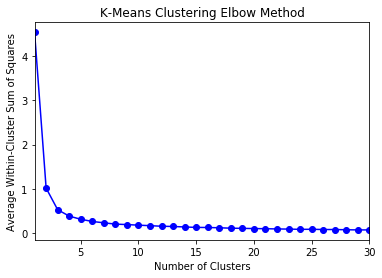

In [10]:
import matplotlib.pyplot as plt
#plot the x and y data
plt.plot(X,Y,'bo-')#blue o's and line
plt.xlim((1,30))
plt.xlabel('Number of Clusters')
plt.ylabel('Average Within-Cluster Sum of Squares')
plt.title('K-Means Clustering Elbow Method')

plt.show()

3 is optimum as it is right on the elbow;
drop from 3 to 4 is there(=>maybe cuz some same species flower may have different chars.) but  is not that significant;, and won't lead to very improved results

# Principle Component Analysis
From Wikipedia - principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

Unless you have a heavy linear algebra background, it's easy to get lost in the eigenvectors and eigenvalues that PCA relies on. Fortunately for us, scikit-learn makes implementing PCA easy and straight forward. In the cell below, we will perform a PCA reduction to reduce the number of features in our dataset to two. As a result of this reduction, we will be able to visualize each instance as an X,Y data point.

In [11]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

#perform principle component analysis
pca=PCA(n_components=2)
pc=pca.fit_transform(df)

#new dimensions
print(pc.shape)
print(pc[:10])#can't use head(10) cuz pc is now an array not df

(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [12]:
# re-fit kmeans model to principle components with appropriate number of clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pc)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Visualization of PCA-reduced Data
Now that our data has been compressed, we can easily visualize it using matplotlib.pyplot. Furthermore, since our data has only two components, we can predict the appropriate cluster for each X, Y point in our plot and produce a color-coordinated meshgrid to display the different clusters in our K means algorithm.

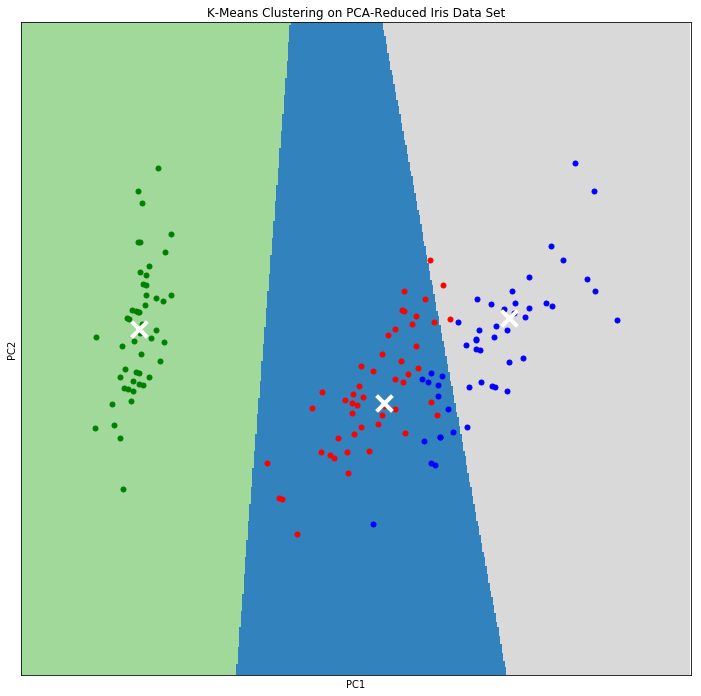

In [13]:
# Visualize high dimensional clusters using principle component

#set the size for the mesh
h=0.02 #determines quality of the mesh [x_min,x_max] x [y_min,y_max]
#high h means lower quality and vice versa

#generate mesh grid
x_min,x_max=pc[:,0].min()-1, pc[:,0].max()+1
y_min,y_max=pc[:,1].min()-1,pc[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# label each point in mesh using last trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])#pas mesh grid to predict()

# generate color plot from results
Z = Z.reshape(xx.shape)#can use yy aswell
plt.figure(figsize = (12, 12))
plt.clf()#clear any prevoius passed data to plt
plt.imshow(Z, interpolation = 'nearest',
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.tab20c,
          aspect = 'auto', origin = 'lower')
#nearest neighbor interpolation ;cmap=color map

# plot the principle components on the color plot(pc's are the actual poinrs on the color plt;the rgb's)
#enumerate so we can index them pc's
for i, point in enumerate(pc):
    if target[i] == 0:
        plt.plot(point[0], point[1], 'g.', markersize = 10)
    if target[i] == 1:
        plt.plot(point[0], point[1], 'r.', markersize = 10)
    if target[i] == 2:
        plt.plot(point[0], point[1], 'b.', markersize = 10)

# plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 250, linewidth = 4,
           color = 'w', zorder = 10)
#adding centroids as scatter plot
#for all three clusters,plot the x([:,0]) and y([:,1]) for centroids; s=size; zorder so they show up in the front

# set plot title and axis limits
plt.title('K-Means Clustering on PCA-Reduced Iris Data Set')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks(())
plt.yticks(())

# display the plot
plt.show()

there are indeed some misclassifications

the first is very clearly clustered(perfect classification=> homogeniety=1=completeness) separately while ther two have some minglings

# take n_clusters =4

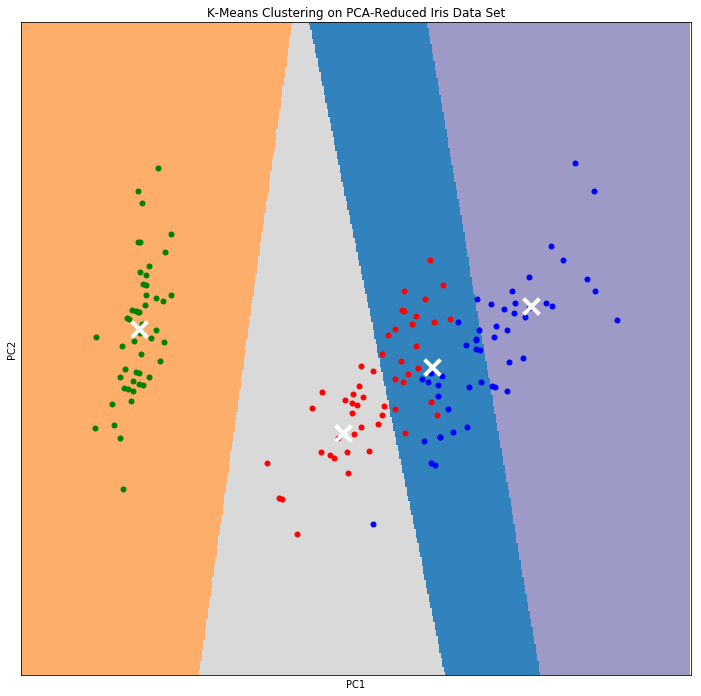

In [14]:
# re-fit kmeans model to principle components with appropriate number of clusters
kmeans = KMeans(n_clusters = 4)
kmeans.fit(pc)

# Visualize high dimensional clusters using principle component

#set the size for the mesh
h=0.02 #determines quality of the mesh [x_min,x_max] x [y_min,y_max]
#high h means lower quality and vice versa

#generate mesh grid
x_min,x_max=pc[:,0].min()-1, pc[:,0].max()+1
y_min,y_max=pc[:,1].min()-1,pc[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# label each point in mesh using last trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])#pas mesh grid to predict()

# generate color plot from results
Z = Z.reshape(xx.shape)#can use yy aswell
plt.figure(figsize = (12, 12))
plt.clf()#clear any prevoius passed data to plt
plt.imshow(Z, interpolation = 'nearest',
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.tab20c,
          aspect = 'auto', origin = 'lower')
#nearest neighbor interpolation ;cmap=color map

# plot the principle components on the color plot(pc's are the actual poinrs on the color plt;the rgb's)
#enumerate so we can index them pc's
for i, point in enumerate(pc):
    if target[i] == 0:
        plt.plot(point[0], point[1], 'g.', markersize = 10)
    if target[i] == 1:
        plt.plot(point[0], point[1], 'r.', markersize = 10)
    if target[i] == 2:
        plt.plot(point[0], point[1], 'b.', markersize = 10)

# plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 250, linewidth = 4,
           color = 'w', zorder = 10)
#adding centroids as scatter plot
#for all three clusters,plot the x([:,0]) and y([:,1]) for centroids; s=size; zorder so they show up in the front

# set plot title and axis limits
plt.title('K-Means Clustering on PCA-Reduced Iris Data Set')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks(())
plt.yticks(())

# display the plot
plt.show()

**Lots of misclassfications!!!!! Not worth it**

TIPS: How Clustering/spearation works?

So it actually hard to say why the 4 features of the original dataset are decriptive enough to separate these clusters; So if you do a visuliaztion you can say look there is a clear separation for green point cluster in the PCA reduced data and this clustering/seperation is also going to be reflected in the higher dimensional feauture spaces and thus AS A RESULT we can cluster this data successfully

# Clustering Metrics
 But did the PCA reduction impact the performance of our K means clustering algorithm? Let's investigate by using some common clustering metrics, such as homogeneity, completeness, and V-measure.

Homogeneity - measures whether or not all of its clusters contain only data points which are members of a single class.
Completeness - measures whether or not all members of a given class are elements of the same cluster
V-measure - the harmonic mean between homogeneity and completeness

In [ ]:
from sklearn import metrics

# K Means clustering on Non Reduced Data
kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(features)

# K Means clustering on PCA Reduced Data
kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(pc)

# print metrics for Non reduced data 
print('Non Reduced Data')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans1.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target, kmeans1.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(target, kmeans1.labels_)))

# print metrics for PCA reduced data
print('Reduced Data')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans2.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target, kmeans2.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(target, kmeans2.labels_)))

So we got slighly worse in pca(made more misclassifications in the pca reduced data)=> cuz during compression you lose some info and clustering is not very accurate but in this case they show similar results(we are still retaining lot of original data in our PCA reduction so yeah it is doing pretty good clustering )

Also finally this also depended on how those 4 features were correlated with each other(correlations means a good candidaite for PCA)

must ensure that you have similar clustering between non-reduced data and pca reduced data else pca is not worthwhile doing so

In [ ]:
# to compare results further, print out the actual labels
print (kmeans1.labels_)
print (kmeans2.labels_)
print (target)

these clusters are assigned random numbers:

we have 1 in first row of first array while we have 0 in first row of 2nd array; but they both refer to the same data point(the green points) this is cuz of unsupervised learning 

**run above cell multiple times to make them same**